In [30]:
# IMPORT NECESSARY LIBRARIES

import scipy
import scipy.ndimage
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image 

In [31]:

# IMPORTING IMAGE USING SCIPY AND TAKING R,G,B COMPONENTS

a = matplotlib.pyplot.imread("college.jpg")
a_np = np.array(a)
print np.shape(a_np)

a_r = a_np[:,:,0]
a_g = a_np[:,:,1]
a_b = a_np[:,:,2]

(330L, 660L, 3L)


In [32]:
def comp_2d(image_2d,numpc): # FUNCTION FOR RECONSTRUCTING 2D MATRIX USING PCA

#     print np.shape(np.matrix(image_2d)),"dsfgfd"
#     print np.shape(np.matrix(np.mean(image_2d , axis = 1))),"nnn"
    cov_mat = np.matrix(image_2d) - np.matrix(np.mean(image_2d , axis = 1)).T
        
    
    eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat)) # USING "eigh", SO THAT PROPRTIES OF HERMITIAN MATRIX CAN BE USED
    p = np.size(eig_vec, axis =1)
    idx = np.argsort(eig_val)
    idx = idx[::-1]
    eig_vec = eig_vec[:,idx]
    eig_val = eig_val[idx]
     # THIS IS NUMBER OF PRINCIPAL COMPONENTS, YOU CAN CHANGE IT AND SEE RESULTS
    if numpc <p or numpc >0:
        eig_vec = eig_vec[:, range(numpc)]
    score = np.dot(eig_vec.T, cov_mat)
    recon = np.dot(eig_vec, score) + np.matrix(np.mean(image_2d, axis = 1)).T # SOME NORMALIZATION CAN BE USED TO MAKE IMAGE QUALITY BETTER
    recon_img_mat = np.uint8(np.absolute(recon)) # TO CONTROL COMPLEX EIGENVALUES
    return recon_img_mat

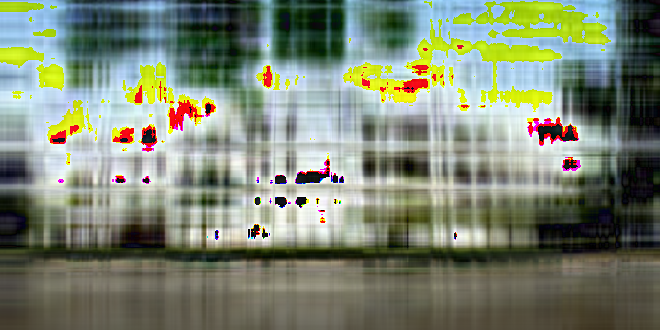

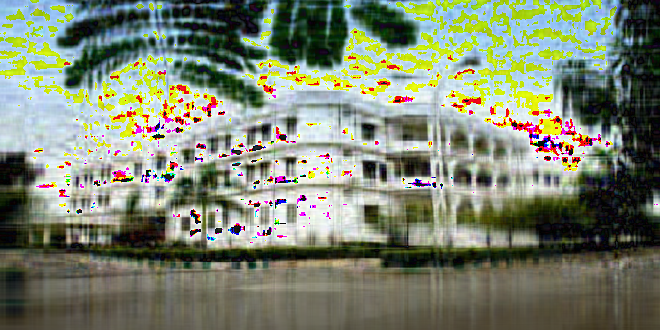

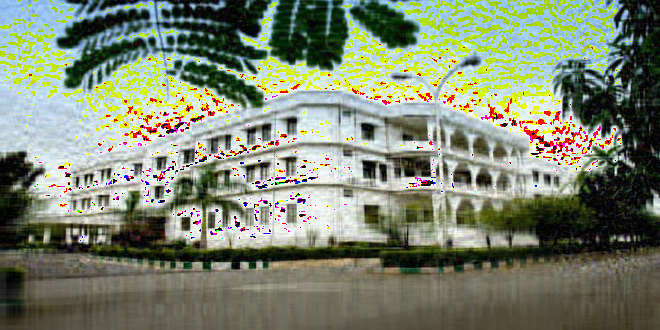

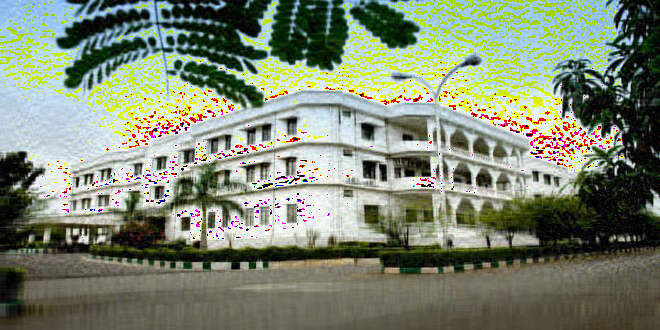

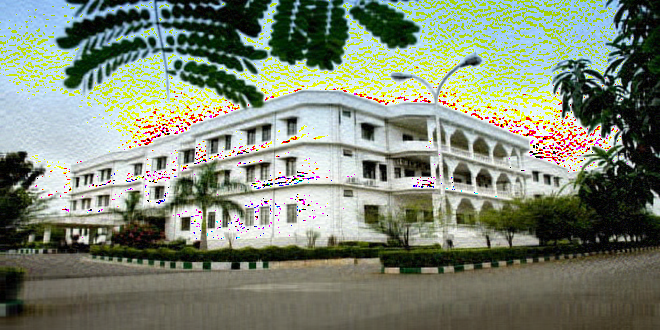

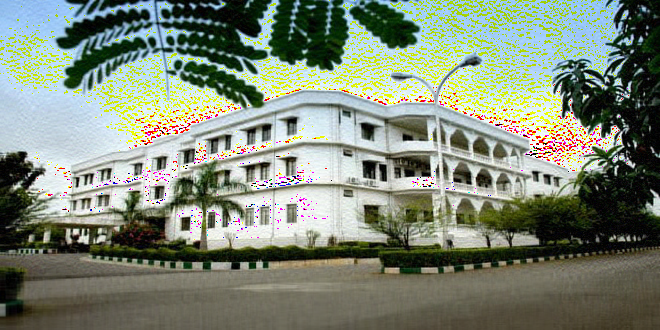

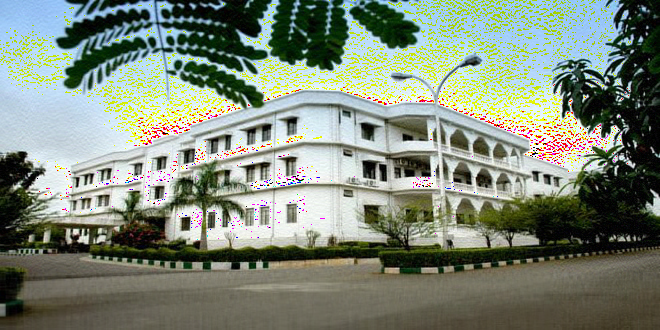

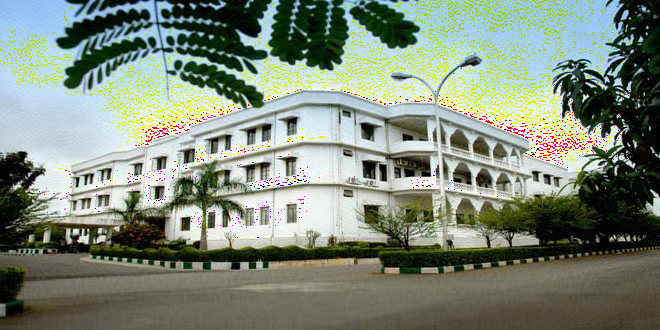

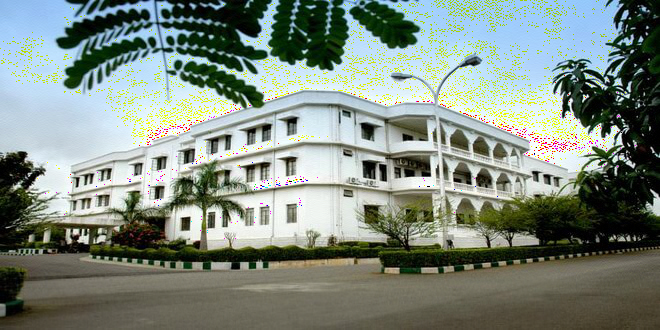

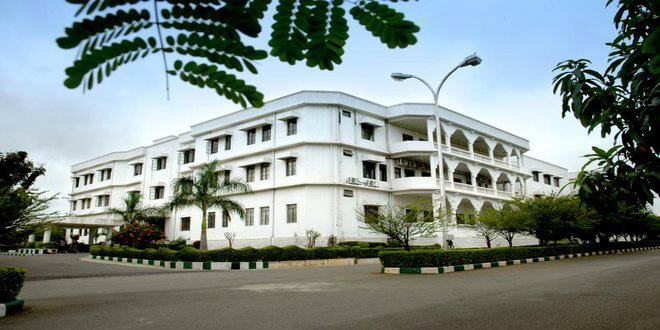

In [33]:
# RECONSTRUCTING R,G,B COMPONENTS SEPARATELY
lis = [0,5,20,40,60,80,100,120,140,200,300]
for i in lis:   
    a_r_recon = np.array(comp_2d(a_r,i))
    a_g_recon = np.array(comp_2d(a_g,i))
    a_b_recon = np.array(comp_2d(a_b,i))

    recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon)) # COMBINING R.G,B COMPONENTS TO PRODUCE COLOR IMAGE
    recon_color_img = Image.fromarray(recon_color_img)
    #recon_color_img.show()
    recon_color_img.save(str(i)+".jpg")
    display(recon_color_img)